Training MSE: 733.0539938675417
Testing MSE: 714.5442782507628


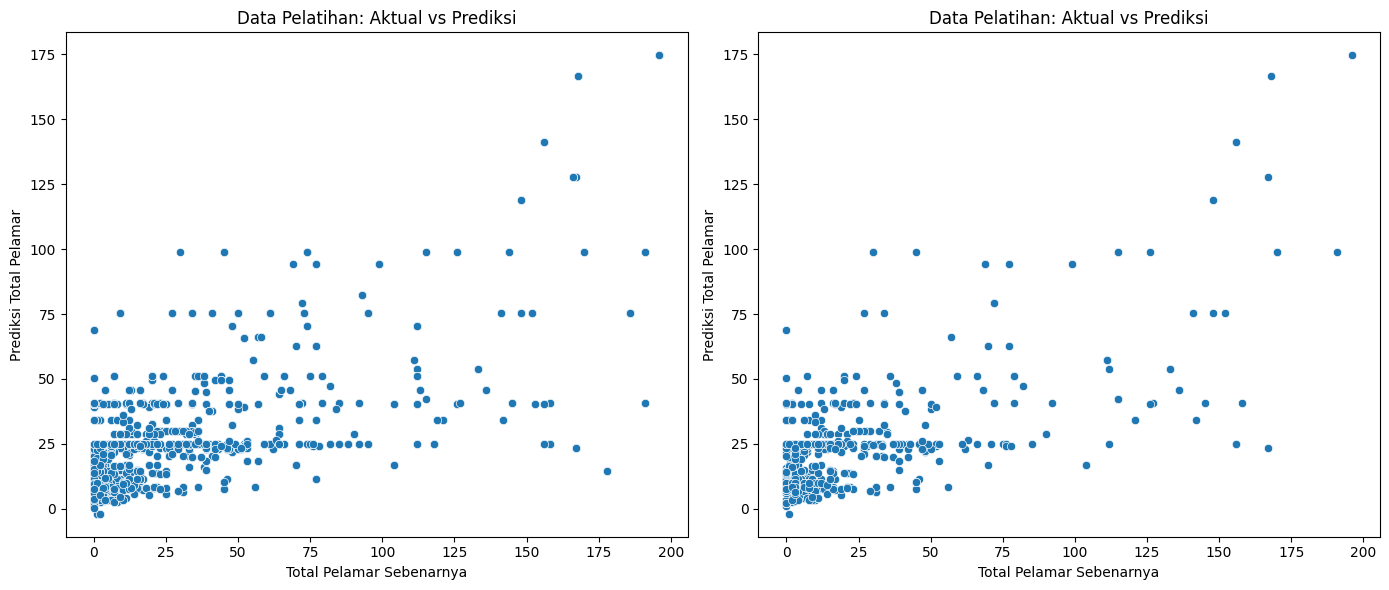

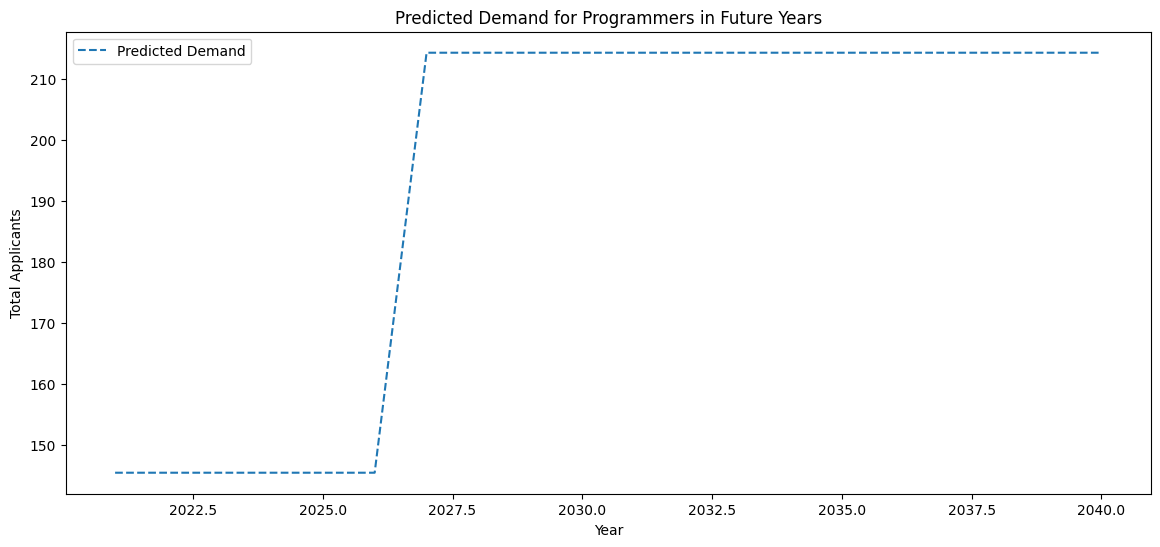

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('linkedIn_tech_jobs.csv')
features = ['LinkedIn_Followers', 'Employee_count', 'PYTHON', 'C++', 'JAVA', 'HADOOP', 'SCALA', 'FLASK', 'PANDAS', 'SPARK', 'NUMPY', 'PHP', 'SQL', 'MYSQL', 'CSS', 'MONGODB', 'NLTK', 'TENSORFLOW', 'LINUX', 'RUBY', 'JAVASCRIPT', 'DJANGO', 'REACT', 'REACTJS', 'AI', 'UI', 'TABLEAU', 'NODEJS', 'EXCEL', 'POWER BI', 'SELENIUM', 'HTML', 'ML']
target = 'Total_applicants'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlabel('Total Pelamar Sebenarnya')
plt.ylabel('Prediksi Total Pelamar')
plt.title('Data Pelatihan: Aktual vs Prediksi')
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Total Pelamar Sebenarnya')
plt.ylabel('Prediksi Total Pelamar')
plt.title('Data Pelatihan: Aktual vs Prediksi')

plt.tight_layout()
plt.show()
num_future_years = 20
future_data = pd.DataFrame.from_records([])
for year in range(2021, 2021 + num_future_years):

    future_data_dict = {
        'LinkedIn_Followers': 7000000 * (1 + 0.05 * (year - 2020)),  # Naik 5% setiap tahun
        'Employee_count': 10001 * (1 + 0.02 * (year - 2020)),  # Naik 2% setiap tahun
        'PYTHON': 1,  # Kemungkinan tetap
        'C++': 0,  # Kemungkinan tetap
        'JAVA': 1,  # Kemungkinan tetap
        'HADOOP': 0,  # Kemungkinan tetap
        'SCALA': 0,  # Kemungkinan tetap
        'FLASK': 1,  # Kemungkinan tetap
        'PANDAS': 1,  # Kemungkinan tetap
        'SPARK': 0,  # Kemungkinan tetap
        'NUMPY': 1,  # Kemungkinan tetap
        'PHP': 0,  # Kemungkinan tetap
        'SQL': 1,  # Kemungkinan tetap
        'MYSQL': 0,  # Kemungkinan tetap
        'CSS': 0,  # Kemungkinan tetap
        'MONGODB': 0,  # Kemungkinan tetap
        'NLTK': 0,  # Kemungkinan tetap
        'TENSORFLOW': 0,  # Kemungkinan tetap
        'LINUX': 1,  # Kemungkinan tetap
        'RUBY': 0,  # Kemungkinan tetap
        'JAVASCRIPT': 1,  # Kemungkinan tetap
        'DJANGO': 1,  # Kemungkinan tetap
        'REACT': 1,  # Kemungkinan tetap
        'REACTJS': 0,  # Kemungkinan tetap
        'AI': 1,  # Kemungkinan tetap
        'UI': 1,  # Kemungkinan tetap
        'TABLEAU': 0,  # Kemungkinan tetap
        'NODEJS': 1,  # Kemungkinan tetap
        'EXCEL': 1,  # Kemungkinan tetap
        'POWER BI': 1,  # Kemungkinan tetap
        'SELENIUM': 0,  # Kemungkinan tetap
        'HTML': 1,  # Kemungkinan tetap
        'ML': 1  # Kemungkinan tetap
    }
    future_data = pd.concat([future_data, pd.DataFrame([future_data_dict])], ignore_index=True)

future_data_scaled = scaler.transform(future_data)

future_demand_pred = model.predict(future_data_scaled)

years = np.arange(2021, 2021 + num_future_years)

plt.figure(figsize=(14, 6))
plt.plot(years, future_demand_pred, label='Predicted Demand', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total Applicants')
plt.title('Predicted Demand for Programmers in Future Years')
plt.legend()
plt.show()
